# Volumetric heat maps

In [1]:
samples = 10
widths = range(1, 29)

In [3]:
import os
import math
import numpy as np
import random
import time
from pyqrack import QrackSimulator

In [4]:
os.environ['QRACK_QUNITMULTI_DEVICES']='1'
os.environ['QRACK_QPAGER_DEVICES']='1'
os.environ['QRACK_QPAGER_DEVICES_HOST_POINTER']='0'
os.environ['QRACK_MAX_ALLOC_MB']='147456,15872'
os.environ['QRACK_MAX_PAGING_QB']='30'
os.environ['QRACK_MAX_CPU_QB']='34'

In [4]:
def mcx(circ, c, q):
    circ.mcx([c], q)

def mcy(circ, c, q):
    circ.mcy([c], q)

def mcz(circ, c, q):
    circ.mcz([c], q)

def macx(circ, c, q):
    circ.macx([c], q)

def macy(circ, c, q):
    circ.macy([c], q)

def macz(circ, c, q):
    circ.macz([c], q)

def rand_u3(circ, q):
    th = random.uniform(0, 4 * math.pi)
    ph = random.uniform(0, 4 * math.pi)
    lm = random.uniform(0, 4 * math.pi)
    circ.u(q, th, ph, lm)

def generate_circuits(width):
    gateSequence = [ 0, 3, 2, 1, 2, 1, 0, 3 ]
    two_qubit_gates = mcx, mcy, mcz, macx, macy, macz

    # Nearest-neighbor couplers:
    row_len = math.ceil(math.sqrt(width))

    time_results = [0 for _ in range(width)]
    
    qsim = QrackSimulator(width)

    for t in range(samples):
        qsim.reset_all()
        d_time_results = []
        start = time.perf_counter()
        
        for i in range(width):
            # Single bit gates
            for j in range(width):
                rand_u3(qsim, j)
            
            # Nearest-neighbor couplers:
            ############################
            # gate = gateSequence.pop(0)
            # gateSequence.append(gate)
            # for row in range(1, row_len, 2):
            #     for col in range(row_len):
            #         temp_row = row
            #         temp_col = col
            #         temp_row = temp_row + (1 if (gate & 2) else -1);
            #         temp_col = temp_col + (1 if (gate & 1) else 0)
            #
            #         if (temp_row < 0) or (temp_col < 0) or (temp_row >= row_len) or (temp_col >= row_len):
            #             continue
            #
            #         b1 = row * row_len + col
            #         b2 = temp_row * row_len + temp_col
            #
            #         if (b1 >= width) or (b2 >= width):
            #             continue
            #
            #         choice = random.choice(two_qubit_gates)
            #         choice(qsim, b1, b2)

            # Fully-connected couplers:
            ###########################
            unused_bits = list(range(width))
            while len(unused_bits) > 1:
                b1 = random.choice(unused_bits)
                unused_bits.remove(b1)
                b2 = random.choice(unused_bits)
                unused_bits.remove(b2)
            
                # Two bit gates
                choice = random.choice(two_qubit_gates)
                choice(qsim, b1, b2)

            d_time_results.append(time.perf_counter() - start)

        for i in range(width):
            time_results[i] += d_time_results[i] / samples

    return time_results

In [5]:
qrack_time_results = {}
for i in widths:
    print("Width: ", i)
    qrack_time_results[i] = generate_circuits(i)

Width:  1
Device #0, Loaded binary from: /home/iamu/.qrack/qrack_ocl_dev_Intel(R)_UHD_Graphics_[0x9bc4].ir
Device #1, Loaded binary from: /home/iamu/.qrack/qrack_ocl_dev_NVIDIA_GeForce_RTX_3080_Laptop_GPU.ir
Width:  2
Width:  3
Width:  4
Width:  5
Width:  6
Width:  7
Width:  8
Width:  9
Width:  10
Width:  11
Width:  12
Width:  13
Width:  14
Width:  15
Width:  16
Width:  17
Width:  18
Width:  19
Width:  20
Width:  21
Width:  22
Width:  23
Width:  24
Width:  25
Width:  26
Width:  27
Width:  28


In [1]:
# qrack_time_results={1: [5.247200078883906e-06], 2: [1.9938800141972022e-05, 7.432319998770253e-05], 3: [1.2960399908479305e-05, 6.832579983893084e-05, 9.82869998551905e-05], 4: [2.0622100055334162e-05, 0.00011555420005606721, 0.00020489720000114173, 0.0003040314000827493], 5: [2.3628800045116803e-05, 0.00012666490001720377, 0.0002075076000437548, 0.00030050290015424256, 0.00038332920003085745], 6: [3.0462500035355333e-05, 0.00017509090012026717, 0.00030178619990692826, 0.00044259549995331334, 0.0005796331998681126, 0.0007056718000058027], 7: [3.2011700113798724e-05, 0.00018658560002222656, 0.00038159540008564363, 0.0005349297999600822, 0.0006769156999325787, 0.0008161675000337708, 0.0009579675000168209], 8: [4.011829996670713e-05, 0.00023322749984799884, 0.00042190819995084904, 0.0006274152000514732, 0.0008424709998507752, 0.0010534947999985887, 0.0012634292999791797, 0.0014712705997226294], 9: [4.115499987165094e-05, 0.00023359639990303552, 0.0005193492000216792, 0.0008023578000575071, 0.0010720907997892938, 0.0013388387998929828, 0.0016006799000933827, 0.001856413399855228, 0.0021121492999554904], 10: [5.2484899788396434e-05, 0.0003523509999467933, 0.0007783991001815593, 0.001290050700026768, 0.0017678332001196395, 0.00223664409995763, 0.002698584300105722, 0.003160972900059278, 0.0036371162000250474, 0.004107448600007047], 11: [6.909690009706537e-05, 0.0003561532002095191, 0.0016558041002099344, 0.003036484400217887, 0.004369428900281491, 0.0058380785001645565, 0.007355553000070359, 0.008976810100193687, 0.010418695700172976, 0.011783066200223402, 0.013146239299931039], 12: [6.055319990991849e-05, 0.00034689910007728035, 0.0012456465000468598, 0.0027277030999357525, 0.0044525559998874085, 0.005871392699827993, 0.007180836099905718, 0.008568433599884883, 0.009936477399969591, 0.011410036699908234, 0.012922620699919209, 0.014269759799935854], 13: [6.297089994404814e-05, 0.0003438122997977189, 0.0015475018998586164, 0.0029975954998917587, 0.0047523219999675344, 0.006120050799836462, 0.0075321868000173715, 0.009322851999968407, 0.010765422900021806, 0.012113227299960273, 0.01345510139981343, 0.0148120980998101, 0.01611104899984639], 14: [6.923760010977276e-05, 0.0004077582001627889, 0.0017144886001005946, 0.0036193326999637066, 0.005690567000056035, 0.007300618099998245, 0.009079623599973273, 0.010682972300037364, 0.012741175799965277, 0.014415691300018808, 0.016102205000061074, 0.017717317000187905, 0.019459791200006293, 0.02120728709987816], 15: [7.438900001943692e-05, 0.00041136429999824033, 0.0018111153000063493, 0.0035631800000373915, 0.005309666200082574, 0.007009045299946592, 0.008734334000018861, 0.010508216099879064, 0.012423717099954957, 0.014059029599957284, 0.015672968799935915, 0.01786873969995213, 0.019598927699917116, 0.021589024799868642, 0.023283317899949908], 16: [8.002049980859738e-05, 0.00044010870005877216, 0.0020756803999574915, 0.004430584399869986, 0.0063975253999160485, 0.008238137899934373, 0.01002840909995939, 0.012145541699919705, 0.014063607399930332, 0.016013527499853807, 0.017822957699900145, 0.019986223599880757, 0.02180082579980081, 0.0236516158998711, 0.02548019079986261, 0.02727302779994716], 17: [8.089659995675903e-05, 0.0004484952998609515, 0.0021244214997750534, 0.004493296099826694, 0.006384671699925093, 0.008244487299907633, 0.010091403199839989, 0.011945724699944548, 0.013797067299947232, 0.015994397399936137, 0.017833241499829455, 0.020000921699920578, 0.02188531960000546, 0.023705972499919882, 0.025533583000014914, 0.027357093399950825, 0.029331625499889925], 18: [9.579590014254792e-05, 0.0005242427000666794, 0.0026901664000433816, 0.005059635900033753, 0.007303173700165644, 0.009478576600031374, 0.011683005800114186, 0.01424233070010814, 0.01645288370009439, 0.018782244500107483, 0.02117384440016394, 0.02399467250015732, 0.026292731700050358, 0.0284586806000334, 0.030710911000187482, 0.03292888270007097, 0.035087549100080655, 0.03759816020001381], 19: [9.661329986556667e-05, 0.0005618247996608261, 0.0032661961997291654, 0.006561745099861582, 0.009773646899884626, 0.013135327599866287, 0.01655424539976593, 0.01957031959982487, 0.022855534299833384, 0.026031390899879627, 0.029646554199734967, 0.03293409499983682, 0.036219421799887644, 0.03929299389983499, 0.04271640679990014, 0.045736357399800906, 0.04869727119967138, 0.051767130699772686, 0.05578110089982146], 20: [9.826710002016626e-05, 0.0005720811997889542, 0.004754671499813412, 0.01160026050001761, 0.0187034790998041, 0.025375161799820488, 0.03269575750000513, 0.03933688989991424, 0.046583677400030866, 0.0538348387998667, 0.060418577800010094, 0.0673011754998697, 0.07394347509980434, 0.08123972229986974, 0.08813462669986621, 0.09461766289987282, 0.10170214669979033, 0.10857105839986615, 0.11508464779981295, 0.12205532269990726], 21: [0.00010006720012825097, 0.0005722916999729933, 0.004729202399903443, 0.016633294100029162, 0.028046088100109046, 0.03999236370009385, 0.051532517900159294, 0.06366432070008159, 0.07607232710006429, 0.08780308469995361, 0.09952243490006368, 0.11132998419989236, 0.12277880090005056, 0.1348246847000155, 0.14607204230005663, 0.15835045880012327, 0.17003782980000323, 0.1814707236999311, 0.1938497286000711, 0.20553614870013914, 0.2175213596000503], 22: [0.0001039499001308286, 0.0006109613999797147, 0.007151093999891601, 0.029430321200015895, 0.05235337709991655, 0.07401742960000775, 0.09680643100000452, 0.11942070769973726, 0.14188751629990293, 0.16388416039999357, 0.18576676610000506, 0.20838845499984018, 0.2312909861998378, 0.2533086350999838, 0.2756149642999844, 0.29804940679996433, 0.32074215550001095, 0.3427834191998954, 0.365165385399996, 0.38658108500003435, 0.40895573939988034, 0.4311597066000104], 23: [0.0001172264001070289, 0.0006460257999606257, 0.011702526600038253, 0.05834795029995802, 0.10113246000009894, 0.14535043459991356, 0.18856735940007635, 0.23354320340013146, 0.27632946350004206, 0.3186321690000113, 0.362831662499957, 0.40769239139999625, 0.45217916100000366, 0.4951379203000215, 0.5414594160000887, 0.588039702200058, 0.631378191100157, 0.6746322606998547, 0.7196396161000849, 0.7640919485999802, 0.8071509028999573, 0.8514510209000037, 0.8965165719000653], 24: [0.00013513729982150835, 0.000704952199885156, 0.02105581279984108, 0.1135309939999388, 0.20929150139982083, 0.3026673903998926, 0.3961478774997886, 0.4889575201998014, 0.581661382599941, 0.6729269826998462, 0.7658494075997624, 0.8602210038998238, 0.9545983193997928, 1.0482528534998892, 1.139849112799766, 1.231442736599911, 1.323622570599855, 1.4146869362999495, 1.5063089657998718, 1.5999919818998023, 1.6912040373998936, 1.784703511199859, 1.8776692897998144, 1.9690025094999328], 25: [0.00012670979995164087, 0.0006999581998570648, 0.023077520100014227, 0.20146356949990152, 0.3823902248000195, 0.5618588418999935, 0.7434531278999202, 0.9219556268999439, 1.103611610199914, 1.2879511372999333, 1.467978188899906, 1.6501056135999534, 1.8332932041000278, 2.01842458889987, 2.1960710620999633, 2.3749418678998153, 2.559866750499896, 2.7390915258000863, 2.924182791699968, 3.101911143699635, 3.2806773985998006, 3.461902985399956, 3.6426481486999363, 3.8202886146000306, 4.002075513599994], 26: [0.00013495280009010458, 0.0007447126999068131, 0.06332766990008168, 0.4427264172998548, 0.8295403847998386, 1.200407623599858, 1.564073232199917, 1.9269157802998051, 2.2921485216002107, 2.660924357900057, 3.029084294400036, 3.3948375786999354, 3.7585969341000234, 4.124806526799785, 4.493404936599927, 4.863233153399869, 5.235812253800032, 5.60209399669966, 5.9707543568000805, 6.342440083199744, 6.713717264399748, 7.083365452799989, 7.460948225700123, 7.829490523300137, 8.197711488199912, 8.56899725180001], 27: [0.00014997960006439827, 0.0007939197999803581, 0.13156042640002852, 0.8719778327997119, 1.6097586156001855, 2.3432889169000193, 3.074721031100126, 3.80279027860015, 4.530765002999943, 5.262537686000178, 6.002634829000454, 6.745944997900006, 7.490454295299968, 8.218056561900266, 8.954512189299749, 9.6945148634004, 10.441127846400379, 11.176060684500042, 11.905818081300096, 12.637332290199993, 13.366657088399915, 14.102051598300022, 14.839832423400004, 15.562801892600145, 16.28118121100015, 17.03108845980023, 17.76572071729988], 28: [0.00023609780037077142, 0.001312532400697819, 0.45803033000047433, 1.8784547133005616, 3.451536530500198, 5.001271574900421, 6.553695322800377, 8.084580317200743, 9.631442814400545, 11.170866348600613, 12.718094751700484, 14.268209464400751, 15.809016040500502, 17.331043113200213, 18.877947957600373, 20.449179085600555, 22.00437609940036, 23.547038778900426, 25.123629855900617, 26.70585495360065, 28.300176738000662, 29.890602124600626, 31.46701858760025, 33.04180008130061, 34.60936661560045, 36.1905493717004, 37.74643452710061, 39.28900509450068]}

## Results

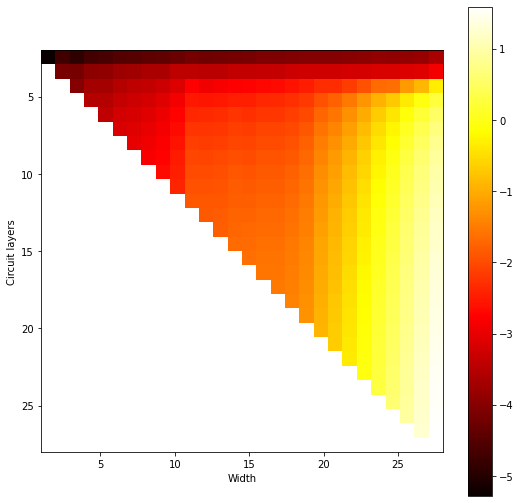

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (9, 9))
# plt.title("Fidelity vs. layer depth, 54 qubits, A100 GPU")
plt.xlabel("Width")
plt.ylabel("Circuit layers")

left = 1
right = 28
bottom = 28
top = 2
extent = [left, right, bottom, top]

h = {}
for key in qrack_time_results:
    h[key] = np.log10(qrack_time_results[key]).tolist()
    h[key] = h[key] + (28 - key) * [0]
h = pd.DataFrame(h)
mask = np.tri(28, k=-1)
h = np.ma.array(h, mask=mask)

plt.colorbar(plt.imshow(h, cmap='hot', interpolation='nearest', extent=extent, aspect=1.038461538))

fig.savefig('heat_map_time.png', dpi=100)

In [8]:
import platform

print(platform.machine())
print(platform.version())
print(platform.platform())
print(platform.uname())
print(platform.system())
print(platform.processor())

x86_64
#43~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Fri Apr 21 16:51:08 UTC 2
Linux-5.19.0-42-generic-x86_64-with-glibc2.35
uname_result(system='Linux', node='sekhmet', release='5.19.0-42-generic', version='#43~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Fri Apr 21 16:51:08 UTC 2', machine='x86_64')
Linux
x86_64


In [9]:
import subprocess

line_as_bytes = subprocess.check_output("nvidia-smi -L", shell=True)
line = line_as_bytes.decode("ascii")
_, line = line.split(":", 1)
line, _ = line.split("(")
print(line.strip())

NVIDIA GeForce RTX 3080 Laptop GPU


In [10]:
import cpuinfo
cpuinfo.get_cpu_info()['brand_raw']

'Intel(R) Core(TM) i9-10980HK CPU @ 2.40GHz'